In [1]:
import os
import librosa
import numpy as np
import pandas as pd
import IPython as ip
import librosa.display
from sklearn import metrics
from datetime import datetime 
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten

In [2]:
path = './UrbanSound8K/dog_bark.wav'

In [3]:
ip.display.Audio(path)

In [4]:
data, sample_rate = librosa.load(path)

In [5]:
print(data)

[0.00573744 0.0067176  0.00190126 ... 0.00268697 0.00402738 0.00636205]


In [6]:
print(sample_rate)

22050


C:\Users\91936\AppData\Local\Temp\ipykernel_17108\3286244943.py:2: FutureWarning: Pass sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(data, sample_rate)


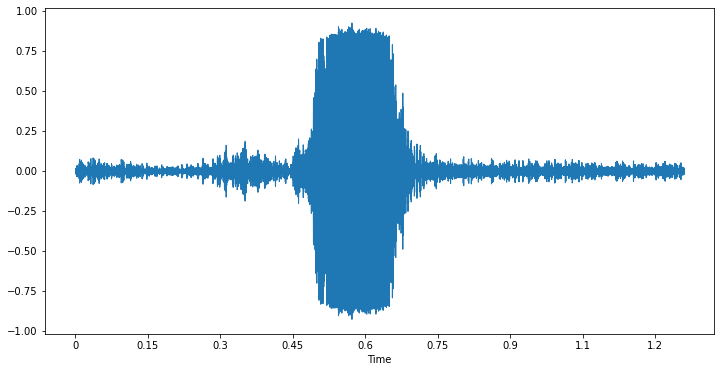

In [7]:
plt.figure(figsize=(12,6))
librosa.display.waveshow(data, sample_rate)

In [8]:
metadata = pd.read_csv('./UrbanSound8K/metadata/UrbanSound8K.csv')

In [9]:
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [ ]:
metadata['class'].values_count()

In [10]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file, res_type="kaiser_fast")
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled = np.mean(mfccs_features.T, axis=0)
    return mfccs_scaled

In [11]:
base_path = './UrbanSound8K/audio/'

In [14]:
features = []
for index, row in metadata.iterrows():
    data_path = os.path.join((base_path),"fold"+str(row['fold'])+"/",str(row['slice_file_name']))
    data_class = row['class']
    data = features_extractor(data_path)
    features.append([data, data_class])

C:\Users\91936\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1323
  return f(*args, **kwargs)
C:\Users\91936\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1103
  return f(*args, **kwargs)
C:\Users\91936\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1523
  return f(*args, **kwargs)


In [15]:
features

[[array([-217.35526   ,   70.22338   , -130.38527   ,  -53.282898  ,
          -21.19913   ,  -22.677622  ,  -10.85597   ,   18.294254  ,
            6.652703  ,   14.324025  ,  -12.167682  ,    2.276837  ,
          -17.779188  ,   10.388951  ,   -6.5828357 ,   -0.69445693,
          -18.336023  ,    1.9942534 ,   -5.143332  ,    8.3024    ,
          -12.645056  ,   -6.529732  ,    4.6176677 ,   -2.1799166 ,
           -6.662824  ,    0.35971075,   -3.9084098 ,    4.7756243 ,
           -6.384521  ,   -5.379818  ,    0.9159783 ,    6.9704943 ,
           -0.248668  ,    1.6782187 ,   -5.611182  ,   -2.9643466 ,
            3.1490574 ,   -1.693053  ,   -0.61698383,    0.3860054 ],
        dtype=float32),
  'dog_bark'],
 [array([-4.2409818e+02,  1.0934077e+02, -5.2919525e+01,  6.0864750e+01,
          2.4529217e-01,  1.7347328e+01,  2.0955825e+00,  1.0712965e+01,
         -1.3986126e+00,  1.2310798e+01, -1.1208863e+01,  2.1075325e+01,
         -9.4902802e+00,  1.3526470e+01, -2.3910540

In [16]:
extracted_features = pd.DataFrame(features,columns=['Feature','class'])

In [17]:
extracted_features.head()

,Feature,class
0,"[-217.35526, 70.22338, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.52066, 52.00812, -...",children_playing
3,"[-413.89984, 101.66373, -35.42945, 53.036354, ...",children_playing
4,"[-446.60352, 113.68541, -52.402214, 60.302044,...",children_playing


In [19]:
X = np.array(extracted_features_df['Feature'].tolist())
y = np.array(extracted_features_df['class'].tolist())

In [22]:
labelencoder = LabelEncoder()

In [23]:
y = to_categorical(labelencoder.fit_transform(y))

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [31]:
n_labels=y.shape[1]

In [32]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###final layer
model.add(Dense(n_labels))
model.add(Activation('softmax'))

In [33]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [34]:
checkpointer = ModelCheckpoint(filepath='./audio_classification.hdf5',
                               verbose=1, save_best_only=True)
model.fit(X_train, y_train, batch_size= 32, epochs= 100, 
          validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)

Epoch 1/100
213/219 [============================>.] - ETA: 0s - loss: 9.8419 - accuracy: 0.1219 
Epoch 1: val_loss improved from inf to 2.28019, saving model to .\audio_classification.hdf5
219/219 [==============================] - 2s 6ms/step - loss: 9.6720 - accuracy: 0.1237 - val_loss: 2.2802 - val_accuracy: 0.1420
Epoch 2/100
219/219 [==============================] - ETA: 0s - loss: 2.5409 - accuracy: 0.1243
Epoch 2: val_loss improved from 2.28019 to 2.27696, saving model to .\audio_classification.hdf5
219/219 [==============================] - 1s 5ms/step - loss: 2.5409 - accuracy: 0.1243 - val_loss: 2.2770 - val_accuracy: 0.1173
Epoch 3/100
200/219 [==========================>...] - ETA: 0s - loss: 2.3294 - accuracy: 0.1308
Epoch 3: val_loss improved from 2.27696 to 2.20417, saving model to .\audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 2.3260 - accuracy: 0.1329 - val_loss: 2.2042 - val_accuracy: 0.1769
Epoch 4/100
206/219 [==========

219/219 [==============================] - 1s 4ms/step - loss: 1.3541 - accuracy: 0.5258 - val_loss: 1.1088 - val_accuracy: 0.6468
Epoch 27/100
209/219 [===========================>..] - ETA: 0s - loss: 1.3111 - accuracy: 0.5483
Epoch 27: val_loss did not improve from 1.10875
219/219 [==============================] - 1s 4ms/step - loss: 1.3132 - accuracy: 0.5470 - val_loss: 1.1170 - val_accuracy: 0.6422
Epoch 28/100
213/219 [============================>.] - ETA: 0s - loss: 1.3146 - accuracy: 0.5475
Epoch 28: val_loss improved from 1.10875 to 1.07752, saving model to .\audio_classification.hdf5
219/219 [==============================] - 1s 6ms/step - loss: 1.3180 - accuracy: 0.5473 - val_loss: 1.0775 - val_accuracy: 0.6611
Epoch 29/100
206/219 [===========================>..] - ETA: 0s - loss: 1.2894 - accuracy: 0.5602
Epoch 29: val_loss improved from 1.07752 to 1.06065, saving model to .\audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 1.2905 -

219/219 [==============================] - 1s 6ms/step - loss: 1.0913 - accuracy: 0.6308 - val_loss: 0.8586 - val_accuracy: 0.7127
Epoch 54/100
209/219 [===========================>..] - ETA: 0s - loss: 1.1033 - accuracy: 0.6265
Epoch 54: val_loss did not improve from 0.85858
219/219 [==============================] - 1s 5ms/step - loss: 1.1018 - accuracy: 0.6258 - val_loss: 0.8703 - val_accuracy: 0.7212
Epoch 55/100
214/219 [============================>.] - ETA: 0s - loss: 1.0812 - accuracy: 0.6292
Epoch 55: val_loss did not improve from 0.85858
219/219 [==============================] - 1s 5ms/step - loss: 1.0818 - accuracy: 0.6285 - val_loss: 0.8622 - val_accuracy: 0.7127
Epoch 56/100
216/219 [============================>.] - ETA: 0s - loss: 1.0629 - accuracy: 0.6331
Epoch 56: val_loss did not improve from 0.85858
219/219 [==============================] - 1s 5ms/step - loss: 1.0633 - accuracy: 0.6336 - val_loss: 0.8629 - val_accuracy: 0.7235
Epoch 57/100
214/219 [================

219/219 [==============================] - 1s 4ms/step - loss: 1.0008 - accuracy: 0.6617 - val_loss: 0.7775 - val_accuracy: 0.7533
Epoch 82/100
215/219 [============================>.] - ETA: 0s - loss: 1.0137 - accuracy: 0.6599
Epoch 82: val_loss did not improve from 0.77746
219/219 [==============================] - 1s 3ms/step - loss: 1.0148 - accuracy: 0.6597 - val_loss: 0.7900 - val_accuracy: 0.7527
Epoch 83/100
219/219 [==============================] - ETA: 0s - loss: 1.0059 - accuracy: 0.6603
Epoch 83: val_loss did not improve from 0.77746
219/219 [==============================] - 1s 3ms/step - loss: 1.0059 - accuracy: 0.6603 - val_loss: 0.7919 - val_accuracy: 0.7499
Epoch 84/100
204/219 [==========================>...] - ETA: 0s - loss: 1.0024 - accuracy: 0.6601
Epoch 84: val_loss did not improve from 0.77746
219/219 [==============================] - 1s 3ms/step - loss: 1.0003 - accuracy: 0.6607 - val_loss: 0.7835 - val_accuracy: 0.7487
Epoch 85/100
206/219 [================